# Fiyat tahmin modeli geliştirmek

Eğitim için hazırlanmış verileri kullanarak otomobiller için fiyat tahmin modeli geliştireceğiz. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression And Multiple Linear Regression
***Simple Linear Regression*** ile iki değişken arasındaki ilişkiyi anlayabiliriz. Bu değişkenler X ve Y olmak üzere
* X = Tahmin için kullanacağımız bağımsız değişken
* Y = Tahmin edeceğimiz bağımlı değişken
$$
Yhat=a+bX
$$
* a (intercept) = regresyon 0 çizgisini diğer bir değişle X=0 olduğundaki Y değerini gösterir.
* b (slope) = regresyon çizgisinin eğimini diğer bir deyişle X'in bir birim değişiminde Y değerinin değişim miktarını verir.

In [3]:
# Liner regresyon modülünü yükleyelim
from sklearn.linear_model import LinearRegression

In [4]:
# Linear Regresyon Objesi yaratalım
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Yakıt tüketim miktarı (highway-mpg) ile fiyat (price) arasındaki olası ilişkiyi inceleyim***

In [5]:
X=df[["highway-mpg"]] # Bunu bir dataframe olarak ürettim.
Y=df["price"] # Tahmin edilecek değeri ise bir seri olarak ürettim.

In [6]:
# Modelimizi eğitelim
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Eğitilen modelimizin tahminlerini aşağıdaki gibi görebiliriz.
Yhat=lm.predict(X)

In [8]:
Yhat[0:5] # ilk beş tahmin

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
# Simple Linear Regresyon için temel değerle olan intercept ve slope değerlerinin ne olduğunu görmek için 
sabit=lm.intercept_ # intercept
egim=lm.coef_ # slope

In [10]:
print("intercept = %f slope= %f" % (sabit,egim))

intercept = 38423.305858 slope= -821.733378


Dolayısı ile linear denklemimiz şöyle olacaktır. <code>***price***=38423.305858 - 821.733378****highway-mpg***</code>

***Multiple Linear Regression***
Birden fazla bağımsız değişkeni kullanarak fiyatı tahmin etmek için model geliştirebiliriz. Ki çoğu zaman gerçek hayatta bu böyle olur.

$$
Y: Tahmin\ edilecek\ değişken\\
X_1 :Tahmin\ için\ kullanılacak\ değişken \ 1\\
X_2: Tahmin\ için\ kullanılacak\ değişken \ 2\\
X_3: Tahmin\ için\ kullanılacak\ değişken \ 3\\
X_4: Tahmin\ için\ kullanılacak\ değişken \ 4\\
$$

$$
a: sabit\\
b_1 :eğim \ değişken \ 1\\
b_2: eğim \ değişken  \ 2\\
b_3: eğim \ değişken  \ 3\\
b_4: eğim \ değişken  \ 4\\
$$

Yukarıdaki tanımları kullanarak aşağıdaki denklemi çözmek için bir model oluşturacağız.

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>Şimdi <code>price</code> değişkenini tahmin etmek için aşağıdaki değşkenleri kullanacağız.:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [11]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [12]:
lm.fit(Z,df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Sabit değer 
lm.intercept_

-15806.62462632923

In [14]:
# Eğimler. Burada birden fazla eğim olacağı için bir array döner
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [15]:
lm.predict(Z)[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

## Modeli değerlendirmek ve görselleştirmek

Linear Regresyon görselleştirmesinde en uygun yöntem ***regplot*** metodu ile çizilecek grafiktir. Bunun için ***seaborn*** kullanacağız.

In [16]:
import seaborn as sns
%matplotlib inline 

(0, 48268.290446898514)

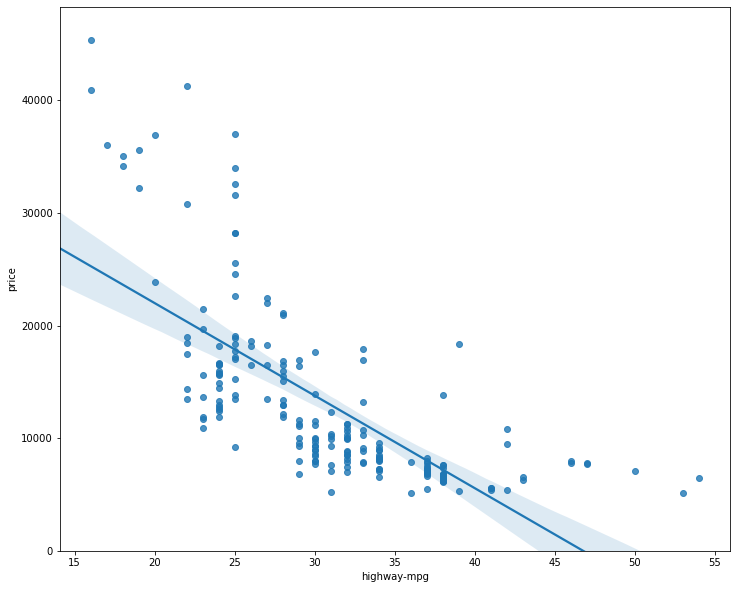

In [17]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

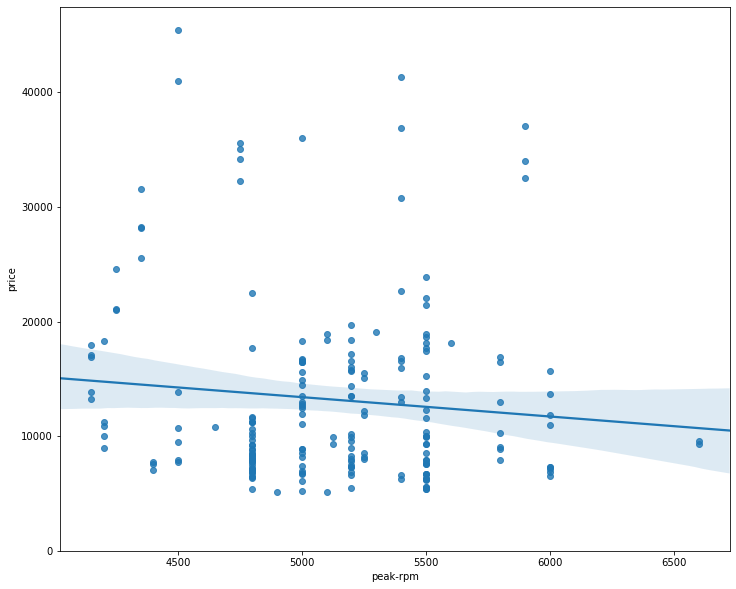

In [18]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

***Seçtiğimiz değişkenlerin price değerini tahmin etmek için uygun olup olmadığını değerlendirmenin bir yoluda <code>corr()</code> metodu ile korelasyona bakmaktır.*** Değerler -1 ile +1 arasındadır. Eksi değerler negatif korelasyonu gösterir.

In [19]:
df.corr() # Tüm alanların birbiri ile korealasyonun getirir. Değerler 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [20]:
df[['price','horsepower','curb-weight','engine-size','highway-mpg']].corr() # Belirli kolonları alalım

,price,horsepower,curb-weight,engine-size,highway-mpg
price,1.000000,0.809575,0.834415,0.872335,-0.704692
horsepower,0.809575,1.000000,0.757976,0.822676,-0.804575
curb-weight,0.834415,0.757976,1.000000,0.849072,-0.794889
engine-size,0.872335,0.822676,0.849072,1.000000,-0.679571
highway-mpg,-0.704692,-0.804575,-0.794889,-0.679571,1.000000


In [21]:
#En yüksek korelasyona sahip ilk beş parametre
df.corr()[["price"]].abs().sort_values(by="price",ascending=False)[1:].head(5) 

,price
engine-size,0.872335
curb-weight,0.834415
horsepower,0.809575
city-L/100km,0.789898
width,0.751265


***Residual Plot***
<code>residplot</code> metodu ile çizilen grafik ile  X ekseni etrafında dağılımın rastgele olup olmadığına bakıyoruz. Eğer rastgele bir dağılım varsa bu iki değişken arasında lineer regresyon uygun olduğu sonucuna varabiliriz.

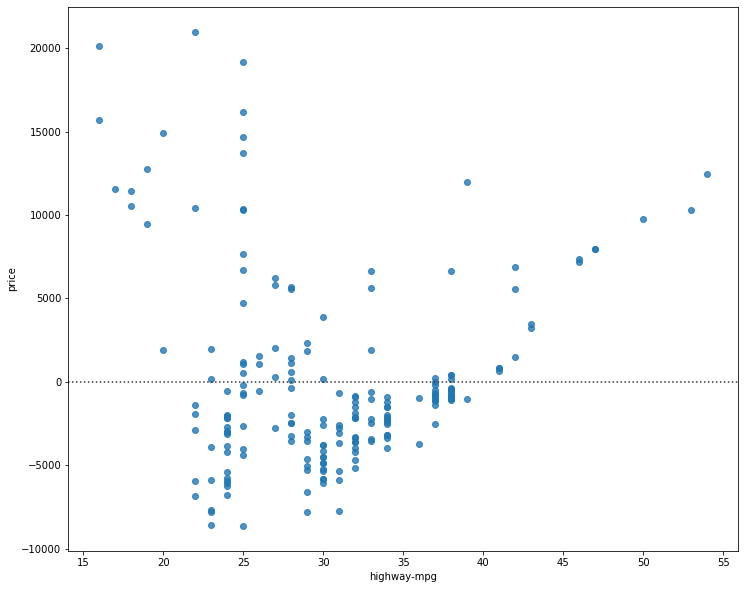

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

Yukarıdaki grafikte X ekseni etrafındaki dağılım rasgele olmadığı için non-lineer bir modelin daha uygun olacağı sonucunu çıkartabiliriz.

***Multiple Linear Regression*** 
Çoklu değişkenden oluşan regresyon modelinin grafiğinin çizilmesi <code>regplot</code> yada <code>residplot</code> ile mümkün değildir. Bununla birlikte ***distribution plot*** ile çizim yapılabilir.Burada gerçek veri ile tahmin edilen verinin karşılaştırması yapılabilir.

In [23]:
Y_hat = lm.predict(Z)

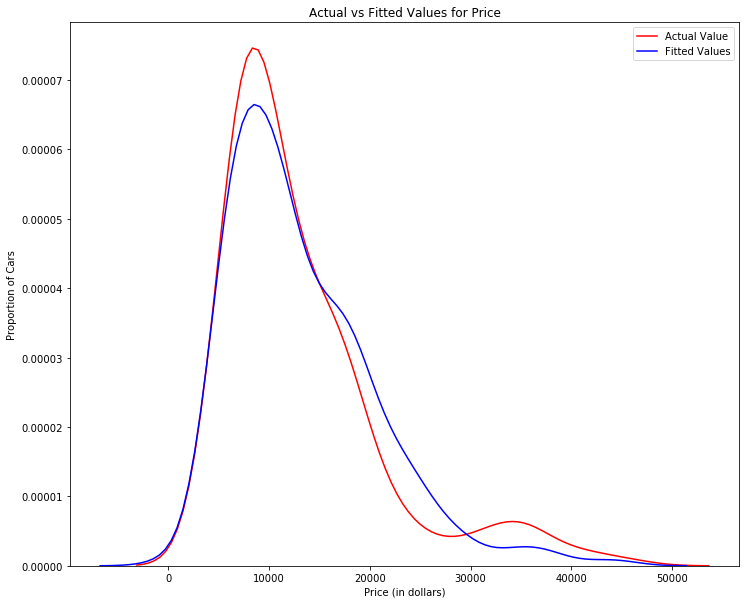

In [24]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Yukarıdaki grafikte tahmin ile gerçek değerin oldukça yakın olduğu bununla birlikte biraz daha iyileştirmeye ihtiyaç olduğu görülüyor.

## Polynominal Regression ve Pipelines

Polinominal regresyon, lineer ve multiple lineer regresyo'nun özel bir durumudur. Yukarıdaki örneklerde olduğu gibi tam olarak uygun sonuç elde edilemediğinde lineer regresyon yerine polinominal regresyon modeli kullanılabilir. Lineer olmayan bir model elde etmek için değişkenlerin 2 yada daha yüksek üslerinden oluşan bir denklemdir. Farklı polinominal fonksiyonlar olabilir.
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [25]:
# Aşağıdaki polinom fonksiyonunun grafiğini çizdirmek için kullanacağız.
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [26]:
x = df['highway-mpg']
y = df['price']

Polinom fonksiyon oluşturmak için <code>numpy.polyfit(x,y,3)</code> metodu kullanarak katsayılar üretilir. Bu kullanım ile 3. dereceden bir polinom fonksiyon üretilir. <code>numpy.poly1d(f)</code> ile polinom fonksiyonu üretilir.

In [27]:
f=np.polyfit(x,y,3)

In [28]:
print(f)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


In [29]:
p=np.poly1d(f)

In [30]:
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


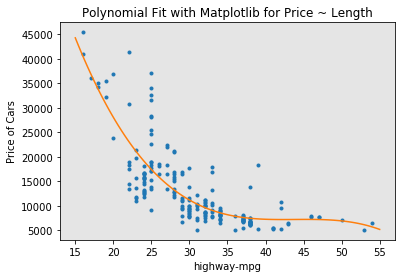

In [31]:
PlotPolly(p,x,y,'highway-mpg')

Yukarıdaki grafik bize lineer modelden daha iyi bir sonuç verdiği görülüyor. Bununla birlikte 11. dereceden bir polinom ile de benzer bir değerlendirme yapabiliriz.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


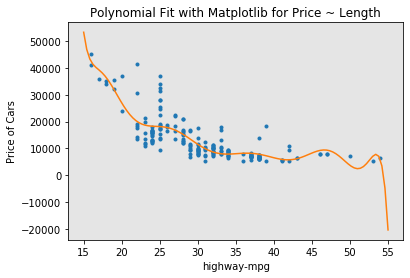

In [32]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'highway-mpg')

Daha yüksek dereceden fonksiyon daha hassas bir uyum sağlıyor verilere fakat tahmin için kullanıldığında olası çok yanlış değerler verebileceğini daha yüksek mesafelelr için price değerini negatif vermesinden anlaşılabilir.

***Multiple Polynominal Model*** daha karmaşık bir şekilde yapılabilir. Bunun için <code>from sklearn.preprocessing import PolynomialFeatures</code> modülü kullanabiliriz.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

2 dereceden Polinom bir obje yaratalım

In [32]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [33]:
Z.shape # Orjinal daha 201 örnek 4 feature

(201, 4)

In [34]:
Z_pr=pr.fit_transform(Z)

In [35]:
Z_pr.shape # Dönüştürülmüş data 201 örnek 15 feature

(201, 15)

***Pipelines*** data işleme adımlarını basitleştirmek için kullanılabilir. Bunun için <code>from sklearn.pipeline import Pipeline</code> ile kullanılır. Ayrıca kuracağımız pipeline içerisindeki adımlar için <code>from sklearn.preprocessing import StandardScaler</code> kullanılır.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Bir pipeline oluşturmaya tuple'lardan oluşan bir liste oluşturarak başlıyoruz.  Bu liste model adı, adım için kullanacağımız metodun adı, tahmin yönteminin adından oluşur.

In [37]:
input=[('scale',StandardScaler()),('polynominal',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [38]:
#Yukarıdaki input listesini kullanarak pipeline constructor yaratırız.
pipe=Pipeline(input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynominal',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Tahmin ve dataların normalize edilmesini eş zamanlı olarak yapabiliriz.

In [39]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynominal',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
ypipe=pipe.predict(Z)

In [41]:
ypipe[0:4] # ilk 4 tahmini yazdırıyoruz.

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## Yaratılan modelin başarımının ölçülmesi

Yukarıda oluşturulan modellerin başarımlarının sadece grafikler ile görülmesi yeterli olmayacaktır.  Bunun için istatistikte yoğunlukla kullanılan iki model vardır. 

* R-squared = Yukarıdaki grafiklerden de görülebilecek olan Regresyon çizgisi ile gerçek değerlerin arasındaki mesafeden hesaplanır. Determinasyon katsayısı olarak bilinir. 
* Mean Squared Error (MSE) = Gerçek değer ile tahmin edilmiş değer arasındaki farkların karelerinin ortalamasıdır. 

***1. Model Simple Linear Regression*** 

In [45]:
lm.fit(X,Y)
#R^2 hesaplama
print("R-square =",lm.score(X,Y))

R-square = 0.4965911884339176


Bu sonuca göre "horsepower" ile "price" ilişkisini gösteren modelin ~%49,66 oranında horsepower değerine göre fiyat değişimini linear model ile açıklamabileceğimizi görüyoruz. Ki bu iyi bir model sonucu değil.

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
mse=mean_squared_error(df["price"],Yhat)
print("Mean Squared Error = ",mse)

Mean Squared Error =  31635042.944639888


***2. Model Multiple linear Regression***

In [50]:
lm.fit(Z,df["price"])
#R^2 hesaplama
print("R-square = ",lm.score(Z,df["price"]))

R-square =  0.8093562806577457


Çoklu parametre ile ~%80,93 oranında fiyat değişimini öngören bir model üretebildiğimizi görüüyoruz. 

In [52]:
Y_predict_multi=lm.predict(Z)
print("Mean Squared Error = ", mean_squared_error(df["price"],Y_predict_multi))

Mean Squared Error =  11980366.87072649


MSE değerinin simple linear regresyona göre daha küçük olduğunu görürüz.

***3. Model Polynominal Fit***

Polinom fonksiyonların R-squared hesaplamasının yapabilmek için <code>sklearn.metrics</code> modülünün <code>r_score</code> fonksiyonunu kullanırız.

In [53]:
from sklearn.metrics import r2_score

In [55]:
r_squared = r2_score(y, p(x))
print("R-square = ", r_squared)

R-square =  0.674194666390652


In [56]:
mean_squared_error(df["price"],p(x))

20474146.426361218

Polinom fonksiyon için olan değerler simple regresyondan iyi ama multiple regresyondan daha kötü